# Foursquare Data in New York City

## 1) Data Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

#from ggplot import *

# for tree -
#pip install -c anaconda python-graphviz

from sklearn.tree import export_graphviz

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier

#for xgboost -
#pip install xgboost

# for ggplot -
#pip install ggplot

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

from sklearn.model_selection import KFold

import geopandas as gpd
import math

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#foR report
#conda install -c conda-forge pandas-profiling

#conda install pandas=0.20.3


%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [2]:
df = pd.read_csv('dataset_TSMC2014_NYC.csv')
df.head(10)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,-240,Tue Apr 03 18:04:38 +0000 2012
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,-240,Tue Apr 03 18:04:42 +0000 2012
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,-240,Tue Apr 03 18:06:18 +0000 2012
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,-240,Tue Apr 03 18:06:19 +0000 2012


## 2) Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227428 entries, 0 to 227427
Data columns (total 8 columns):
userId             227428 non-null int64
venueId            227428 non-null object
venueCategoryId    227428 non-null object
venueCategory      227428 non-null object
latitude           227428 non-null float64
longitude          227428 non-null float64
timezoneOffset     227428 non-null int64
utcTimestamp       227428 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 13.9+ MB


In [4]:
df.describe(include='all')

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
count,227428.000000,227428,227428,227428,227428.000000,227428.000000,227428.000000,227428
unique,NaN,38333,400,251,NaN,NaN,NaN,224653
top,NaN,42911d00f964a520f5231fe3,4bf58dd8d48988d103941735,Bar,NaN,NaN,NaN,Thu May 03 12:00:10 +0000 2012
freq,NaN,1147,15334,15978,NaN,NaN,NaN,5
mean,535.304817,NaN,NaN,NaN,40.754045,-73.974556,-253.392019,NaN
std,305.398774,NaN,NaN,NaN,0.072458,0.086209,43.234750,NaN
min,1.000000,NaN,NaN,NaN,40.550852,-74.274766,-420.000000,NaN
25%,287.000000,NaN,NaN,NaN,40.718330,-74.000633,-240.000000,NaN
50%,523.000000,NaN,NaN,NaN,40.747745,-73.983479,-240.000000,NaN
75%,793.000000,NaN,NaN,NaN,40.778374,-73.945709,-240.000000,NaN


In [5]:
df.describe()

,userId,latitude,longitude,timezoneOffset
count,227428.000000,227428.000000,227428.000000,227428.000000
mean,535.304817,40.754045,-73.974556,-253.392019
std,305.398774,0.072458,0.086209,43.234750
min,1.000000,40.550852,-74.274766,-420.000000
25%,287.000000,40.718330,-74.000633,-240.000000
50%,523.000000,40.747745,-73.983479,-240.000000
75%,793.000000,40.778374,-73.945709,-240.000000
max,1083.000000,40.988332,-73.683825,660.000000


In [6]:
df[["timezoneOffset","userId"]].groupby(['timezoneOffset'], as_index=False).count().sort_values(by='userId', ascending=False)

,timezoneOffset,userId
3,-240,170569
2,-300,56403
8,540,407
6,420,30
0,-420,8
1,-360,4
5,120,4
4,-180,1
7,480,1
9,660,1


In [7]:
#Sorting percantage of Venue Category 
percent = df[["venueCategory","userId"]].groupby(['venueCategory'], as_index=False).count().sort_values(by='userId', ascending=False)
percent['userId']= percent['userId']/percent['userId'].sum()
print(percent)

                                venueCategory    userId
22                                        Bar  0.070255
121                            Home (private)  0.067635
165                                    Office  0.056018
223                                    Subway  0.041103
114                      Gym / Fitness Center  0.040325
54                                Coffee Shop  0.033021
94                          Food & Drink Shop  0.029003
239                             Train Station  0.028176
170                                      Park  0.021123
161                              Neighborhood  0.020244
38                                Bus Station  0.019672
67                              Deli / Bodega  0.018529
192  Residential Building (Apartment / Condo)  0.018401
166                      Other Great Outdoors  0.018177
3                         American Restaurant  0.016273
56                  College Academic Building  0.015297
35                                   Building  0

In [8]:
#convert time
import datetime
data = []
for utcoffset_index, utcoffset in enumerate(df['utcTimestamp']):    
    year = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%Y')
    month = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%m')
    day = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%d')
    weekday = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%a')
    time = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%X')
    data.append([year, month, day, weekday, time])

In [9]:
df_1 = pd.DataFrame(data, columns = ['year', 'month', 'day', 'weekday', 'time']) 

In [10]:
for col in df_1.columns:
    if col not in ['weekday', 'time']:
        df[col] = pd.to_numeric(df_1[col])
    else:
        df[col] = df_1[col]

### 2.1 To Determine Cut off List

In [11]:
#cut off list
cat2=['Bar'
,'Home (private)'
,'Office'
,'Subway'
,'Gym / Fitness Center'
,'Coffee Shop'
,'Food & Drink Shop'
,'Train Station'
,'Park'
,'Neighborhood']

In [12]:
def filter_category(venueCategory):
    if venueCategory in cat2:
        return venueCategory
    else:
        return 'Other'

In [13]:
df['New_category']=df['venueCategory'].apply(filter_category)
df.head(3)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,year,month,day,weekday,time,New_category
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012,4,3,Tue,18:00:09,Other
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,2012,4,3,Tue,18:00:25,Other
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012,4,3,Tue,18:02:24,Home (private)


#### v1

In [14]:
#cut off list v1
percent = df[["venueCategory","userId"]].groupby(['venueCategory'], as_index=False).count().sort_values(by='userId', ascending=False)
percent['userId']= percent['userId']/percent['userId'].sum()
cat_list_v1=percent[percent['userId']>0.02]['venueCategory']
cat_list_v1 = list(cat_list_v1)

In [15]:
def filter_category_v1(venueCategory):
    if venueCategory in cat_list_v1:
        return venueCategory
    else:
        return 'Other'

In [16]:
df['New_category']=df['venueCategory'].apply(filter_category_v1)
df.head(3)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,year,month,day,weekday,time,New_category
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012,4,3,Tue,18:00:09,Other
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,2012,4,3,Tue,18:00:25,Other
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012,4,3,Tue,18:02:24,Home (private)


#### v2

In [17]:
#cut off list parameters v2
ratio=0.03
variable='venueCategory'
count_value="userId"

In [18]:
percent = df[[variable,count_value]].groupby([variable], as_index=False).count().sort_values(by=count_value, ascending=False)
percent[count_value]= percent[count_value]/percent[count_value].sum()
cat_list_v2 = list(percent[percent[count_value]>ratio][variable])

In [19]:
def filter_category_v2(category):
    if category in cat_list_v2:
        return category
    else:
        return 'Other'

In [20]:
df['New_category']=df['venueCategory'].apply(filter_category_v2)
df.head(3)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,year,month,day,weekday,time,New_category
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012,4,3,Tue,18:00:09,Other
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,2012,4,3,Tue,18:00:25,Other
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012,4,3,Tue,18:02:24,Home (private)


In [21]:
#Group by
variable='venueCategoryId'
count_value="userId"

## 3) Data Visualization

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

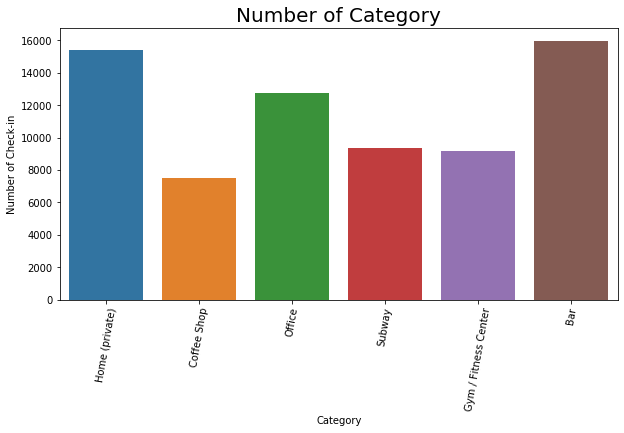

In [22]:
# Number of Category  
plt.figure(figsize=(10,5)) #to adjust the graph size
sns.countplot(x='New_category',data=df[df['New_category'] != 'Other'] )
plt.title('Number of Category',fontsize=20)
plt.xlabel('Category')
plt.ylabel('Number of Check-in')
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

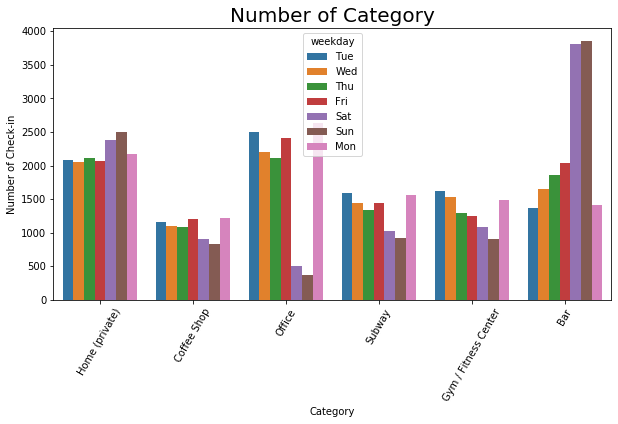

In [23]:
# Number of Category in Weekday
plt.figure(figsize=(10,5)) #to adjust the graph size
sns.countplot(x='New_category',data=df[df['New_category'] != 'Other'], hue='weekday')
plt.title('Number of Category',fontsize=20)
plt.xlabel('Category')
plt.ylabel('Number of Check-in')
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

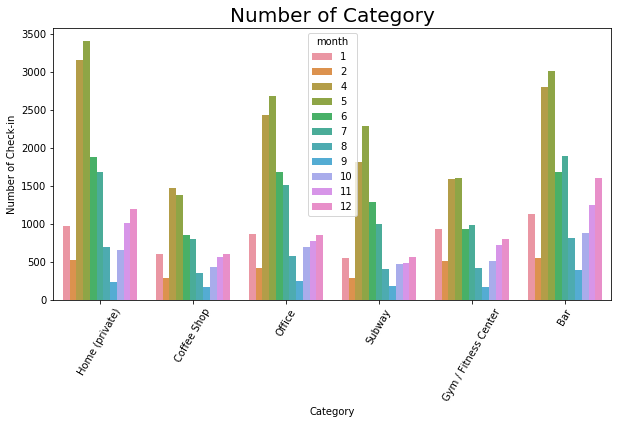

In [24]:
# Number of Category in Month

plt.figure(figsize=(10,5)) #to adjust the graph size
sns.countplot(x='New_category',data=df[df['New_category'] != 'Other'], hue='month')
plt.title('Number of Category',fontsize=20)
plt.xlabel('Category')
plt.ylabel('Number of Check-in')
plt.xticks(rotation=60)

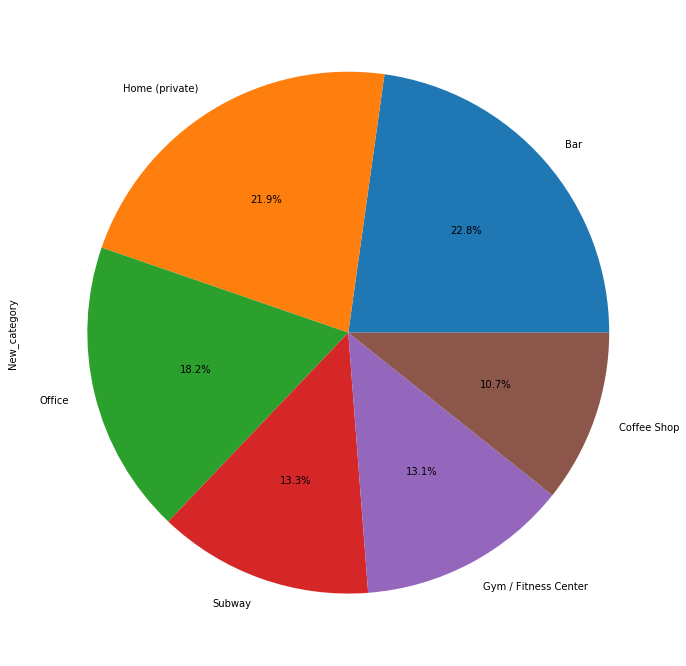

In [25]:
#pie chart
df[df['New_category'] != 'Other']["New_category"].value_counts().plot(kind="pie", figsize=(20, 12), autopct='%1.1f%%')

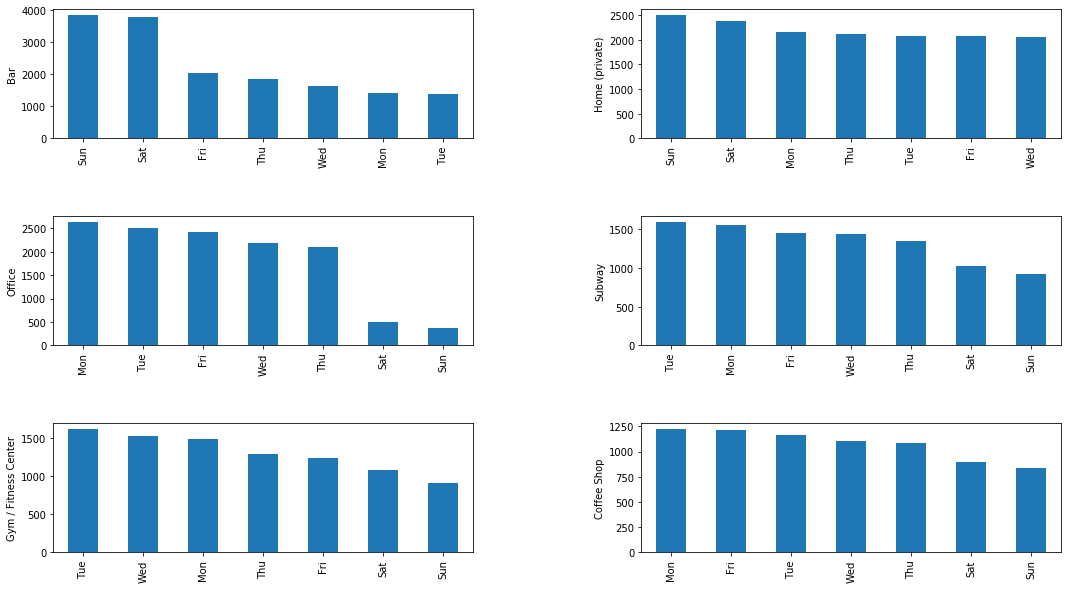

In [26]:
#Bar chart represents the visualization of the most common crime in each district
cat = [df[df['New_category'] != 'Other']["New_category"].value_counts().index[x] for x in range(6)]
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
for var, subplot in zip(cat, ax.flatten()):
    df[df['New_category'] != 'Other'][df[df['New_category'] != 'Other']["New_category"]==var]["weekday"].value_counts().plot(kind="bar",ax=subplot)
    subplot.set_ylabel(var)
fig.subplots_adjust(left=0.2, wspace=0.4, hspace = 0.6)

# 4) Interactive Mapping

In [27]:
# drop null rows
df_2=df[(df.New_category == 'Bar')&(df.weekday == 'Mon')]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 6151 to 225622
Data columns (total 14 columns):
userId             1407 non-null int64
venueId            1407 non-null object
venueCategoryId    1407 non-null object
venueCategory      1407 non-null object
latitude           1407 non-null float64
longitude          1407 non-null float64
timezoneOffset     1407 non-null int64
utcTimestamp       1407 non-null object
year               1407 non-null int64
month              1407 non-null int64
day                1407 non-null int64
weekday            1407 non-null object
time               1407 non-null object
New_category       1407 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 164.9+ KB


In [28]:
# Create a map
m_1 = folium.Map(location=[40.701,-73.915], tiles='openstreetmap', zoom_start=9)

# Display the map
m_1

In [29]:
# Create a map
m_2 = folium.Map(location=[40.701,-73.915], tiles='cartodbpositron', zoom_start=9)

# Add points to the map
for idx, row in df_2.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Display the map
m_2

In [30]:
# Create the map
m_3 = folium.Map(location=[40.701,-73.915], tiles='cartodbpositron', zoom_start=9)


# Add points to the map
mc = MarkerCluster()
for idx, row in df_2.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
            popup_text = """<b><b>Year : {},
                            Month : {},
                            Time : <b><b>{}"""
            popup_text = popup_text.format(row['year'],row['month'],row['time'] )

            mc.add_child(Marker([row['latitude'], row['longitude']], popup= popup_text))

m_3.add_child(mc)

# Display the map
m_3

In [31]:

# Create a base map
m_4 = folium.Map(location=[40.701,-73.915], tiles='cartodbdark_matter', zoom_start=9)

# Add a heatmap to the base map
HeatMap(data=df_2[['latitude', 'longitude']], radius=10).add_to(m_4)

# Display the map
m_4